# Memahami Machine Learning

Memberikan kemampuan kepada komputer untuk Belajar

## Apa itu Machine Learning?

Machine Learning adalah mesin yang dikembangkan untuk bisa belajar dengan sendirinya tanpa arahan dari penggunanya.

Contoh machine learning di sekitar kita:
- email spam
- sistem rekomendasi aplikasi
- mobil tanpa awak

Membangun model dari contoh input untuk membuat data-driven prediction.

Pada machine learning kita siapkan data dengan format yang bisa diproses, kemudian kita berikan algoritma, lalu algoritma itu akan menganalisa datanya lalu akan menciptakan model untuk menyelesaikan masalah berdasarkan data yang diberikan.

Terdapat 2 tipe teknik dalam machine learning, yaitu:
- Supervised (contoh: Prediksi Harga Rumah)
- Unsupervised (contoh: Data Cluster)

Supervised,
- Value prediction
- Perlu hasil prediksi
- Model prediksi data baru

Unsupervised,
- Data clustering
- Tidak perlu cluster
- Akses data cluster

## Persiapan

- Jupyter notebook
- Python 3
- Anaconda

## Workflow

Permasalahan => Persiapan data => Memilih algoritma => Melatih model => Uji model

## Mempersiapkan Data

1. <b>Tidy Data</b>, yaitu data yang lebih mudah dimanipulasi, variabelnya adalah kolom, dan observasinya adalah baris.
2. Data bisa didapatkan dari <b>Google, Data Pemerintahan, dan Data Perusahaan</b>.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Loading and Review Data

In [2]:
df = pd.read_csv('./data/Placement_Data_Full_Class.csv')

In [3]:
df.shape

(215, 15)

In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


## Cleaning Data

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
df.fillna(df.salary.mean() , inplace=True)

In [9]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

## Inspect Data

In [10]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

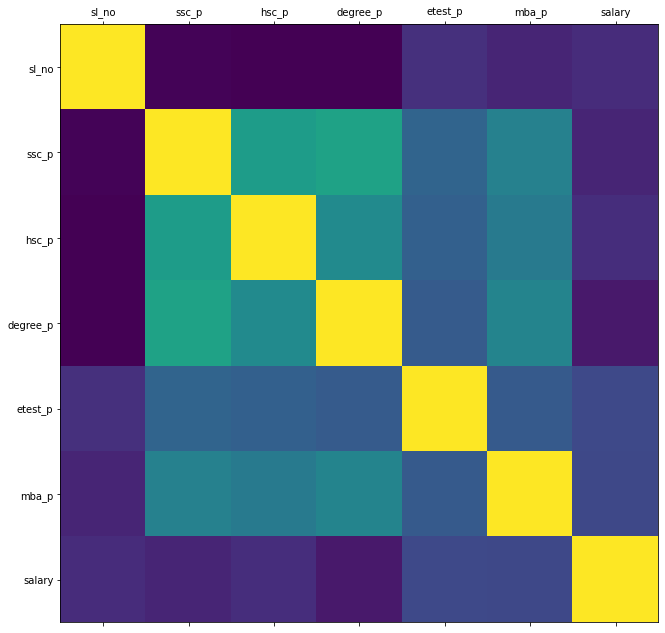

In [11]:
plot_corr(df)

In [12]:
df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.051550
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.023571
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.054506
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.014148
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.152829
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.146324
salary,0.051550,0.023571,0.054506,-0.014148,0.152829,0.146324,1.000000


## Merapihkan Data

In [13]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


In [14]:
df['salary'] = df['salary'].astype(int)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000


In [15]:
del df['sl_no']

In [16]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000


In [17]:
workex_map = {'Placed':1, 'Not Placed':0}
df['status'] = df['status'].map(workex_map)

df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1,270000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1,200000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1,250000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0,288655
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1,425000


In [18]:
num_obs = len(df)
num_yes = len(df.loc[df['status']==1])
num_no = len(df.loc[df['status']==0])

print("Jumlah Pekerja: {0} ({1:2.2f}%)".format(num_yes, (num_yes/num_obs) * 100))
print("Jumlah Tidak Bekerja: {0} ({1:2.2f}%)".format(num_no, (num_no/num_obs) * 100))

Jumlah Pekerja: 148 (68.84%)
Jumlah Tidak Bekerja: 67 (31.16%)


## Memilih Algoritma

Ada beberapa faktor, yaitu:
- Learning Type (Supervised, Unsupervised)
- Result (Regression, Classification)
- Complexity
- Basic vs Enhanced

Regression adalah kontinyus value, seperti prediksi harga rumah yang harganya tidak tetap.

Classification adalah diskrit value, seperti (small, medium, atau large), (true atau false)

## Memilih algoritma berdasarkan kasus

Contoh, 

disini terdapat 3 kandidat algoritma yaitu:
- Naive Bayes
- Logistic Regression, hasilnya bilinear (0 atau 1)
- Decision Tree, seperti if else

Naive Bayes
- Berdasarkan kemungkinan
- Memiliki bobot fitur yang sama
- Mmebutuhkan sedikit data
- Simple dan performanya cepat & stabil pada perubahan data

## Apa itu model training?

Model training adalah membiarkan data yang spesifik untuk melatih algoritma machine learning yang sudah kita pilih, untuk menghasilkan model yang spesifik seperti yang kita inginkan.

## Proses Training

1. Split Data, 70% untuk training dan 30% untuk testing (ini wajib).
2. Train Model
3. Evaluasi Model, untuk uji akurasi.

Pilih fitur untuk training yang paling minimal, yaitu fitur mana yang bisa kita pakai dan fitur mana yang bisa kita buang. Agar prosesnya lebih cepat.

## Melatih Model dengan Python

Kita bisa menggunakan function-function yang disediakan scikit-learn.

- Data Splitting
- Pre-processing
- Feature Selection
- Model Training

## Training Algoritma

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ssc_b'] = le.fit_transform(df['ssc_b'])
df['hsc_b'] = le.fit_transform(df['hsc_b'])
df['hsc_s'] = le.fit_transform(df['hsc_s'])
df['degree_t'] = le.fit_transform(df['degree_t'])
df['workex'] = le.fit_transform(df['workex'])
df['specialisation'] = le.fit_transform(df['specialisation'])

In [20]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000


In [21]:
# splitting data
from sklearn.model_selection import train_test_split


X = df
y = df['status']

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=split_test_size,
                                                    random_state=42)

In [22]:
print("{0:0.2f}% ada pada training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% ada berapa pada test set".format((len(X_test)/len(df.index)) * 100))

69.77% ada pada training set
30.23% ada berapa pada test set


In [23]:
print("Jumlah Original Placed: {0} ({1:2.2f}%)".format(len(df.loc[df['status']==1]), (len(df.loc[df['status']==1])/len(df.index)*100)))
print("Jumlah Original Not Placed: {0} ({1:2.2f}%)".format(len(df.loc[df['status']==0]), (len(df.loc[df['status']==0])/len(df.index)*100)))


print("Training True: {0} ({1:2.2f}%)".format(len(y_train[y_train[:]==1]), (len(y_train[y_train[:]==1])/len(y_train)*100)))
print("Training False: {0} ({1:2.2f}%)".format(len(y_train[y_train[:]==0]), (len(y_train[y_train[:]==0])/len(y_train)*100)))

print("Test True: {0} ({1:2.2f}%)".format(len(y_test[y_test[:]==1]), (len(y_test[y_test[:]==1])/len(y_test)*100)))
print("Test False: {0} ({1:2.2f}%)".format(len(y_test[y_test[:]==0]), (len(y_test[y_test[:]==0])/len(y_test)*100)))

Jumlah Original Placed: 148 (68.84%)
Jumlah Original Not Placed: 67 (31.16%)
Training True: 104 (69.33%)
Training False: 46 (30.67%)
Test True: 44 (67.69%)
Test False: 21 (32.31%)


In [24]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000


In [25]:
print("# rows in gender {0}".format(len(df.loc[df['gender']==0])))
print("# rows in ssc_p {0}".format(len(df.loc[df['ssc_p']==0])))
print("# rows in ssc_b {0}".format(len(df.loc[df['ssc_b']==0])))
print("# rows in hsc_p {0}".format(len(df.loc[df['hsc_p']==0])))
print("# rows in hsc_b {0}".format(len(df.loc[df['hsc_b']==0])))
print("# rows in hsc_s {0}".format(len(df.loc[df['hsc_s']==0])))
print("# rows in degree_p {0}".format(len(df.loc[df['degree_p']==0])))
print("# rows in degree_t {0}".format(len(df.loc[df['degree_t']==0])))
print("# rows in workex {0}".format(len(df.loc[df['workex']==0])))
print("# rows in etest_p {0}".format(len(df.loc[df['etest_p']==0])))
print("# rows in specialisation {0}".format(len(df.loc[df['specialisation']==0])))
print("# rows in mba_p {0}".format(len(df.loc[df['mba_p']==0])))
print("# rows in salary {0}".format(len(df.loc[df['salary']==0])))

# rows in gender 76
# rows in ssc_p 0
# rows in ssc_b 116
# rows in hsc_p 0
# rows in hsc_b 84
# rows in hsc_s 11
# rows in degree_p 0
# rows in degree_t 145
# rows in workex 141
# rows in etest_p 0
# rows in specialisation 120
# rows in mba_p 0
# rows in salary 0


In [28]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB()

## Uji Akurasi

In [29]:
y_pred = nb_model.predict(X_train)

from sklearn import metrics
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train, y_pred)))

Accuracy: 1.0000


In [30]:
y_pred_test = nb_model.predict(X_test)

print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train, y_pred)))
print(y_test)

Accuracy: 1.0000
200    1
212    1
138    1
176    1
15     1
      ..
68     0
5      0
136    0
56     1
100    0
Name: status, Length: 65, dtype: int64


In [32]:
print('Confusion Matrix')

print("{0}".format(metrics.confusion_matrix(y_test, y_pred_test)))
print("")
print("Classification Matrix")
print("{0}".format(metrics.classification_report(y_test, y_pred_test)))

Confusion Matrix
[[21  0]
 [ 0 44]]

Classification Matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        44

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



## Cross Validation

In [37]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv= LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight='balanced', max_iter=500)
lr_cv.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, max_iter=500,
                     n_jobs=-1, random_state=42, refit=False)

In [39]:
lr_pred_test =lr_cv.predict(X_test)

print("{0}".format(metrics.confusion_matrix(y_test, lr_pred_test)))
print("")
print("Classification Matrix")
print("{0}".format(metrics.classification_report(y_test, lr_pred_test)))

[[15  6]
 [ 6 38]]

Classification Matrix
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        21
           1       0.86      0.86      0.86        44

    accuracy                           0.82        65
   macro avg       0.79      0.79      0.79        65
weighted avg       0.82      0.82      0.82        65



In [46]:
import pickle
pickle.dump(lr_cv, open("work_status.pkl", "wb"))